## Understanding and Predicting Employee Turnover

### HR_Analytics


## Table of Contents
## The Problem
## Why is Employee Turnover a Problem?
## Data Quality Check
### 1. Simple Inspection of Data

## Descriptive Statistics
### 1. Summary Statistics, Turnover Rate, Size of Data
### 2. Correlation Matrix

## Exploratory Data Analysis


In [1]:
# Import Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [2]:
# Read the dataset
hr_df = pd.read_csv('/Users/nikhilgharge93gmail.com/Desktop/HR_Analytics/HR-data.csv')

In [3]:
# Overview of data
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
# Can you check to see if there are any missing values in our data set
hr_df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

#### As we can see from the dataset, there isnt any null values that exist in the dataset.

In [5]:
# Rename all column names just for our satisfaction
hr_df = hr_df.rename(columns = {'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'})
hr_df.head()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
# Info regarding dataset
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   satisfaction         14999 non-null  float64
 1   evaluation           14999 non-null  float64
 2   projectCount         14999 non-null  int64  
 3   averageMonthlyHours  14999 non-null  int64  
 4   yearsAtCompany       14999 non-null  int64  
 5   workAccident         14999 non-null  int64  
 6   turnover             14999 non-null  int64  
 7   promotion            14999 non-null  int64  
 8   department           14999 non-null  object 
 9   salary               14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
# Number of employees in the dataset
hr_df.shape

(14999, 10)

 No of employees are 14999 and total features including target variable is 10.

In [8]:
# # Calculate the turnover rate of our company's dataset. What's the rate of turnover?
turnover_rate = hr_df.turnover.value_counts() / 14999
turnover_rate

0    0.761917
1    0.238083
Name: turnover, dtype: float64

 As we can see from the target variable in the dataset, its highly imbalanced dataset.  

In [9]:
# Descriptive statistics
hr_df.describe()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## Exploratory Data Analysis (EDA)

In [10]:
# Functions that we will use later on
def data_info(data):
    return data.info()

def creating_boxplots(size, target, features, data):
    plt.figure(figsize=size)
    for i in range(len(numerical_vars)):
        plt.subplot(5, 3, i+1)
        sns.boxplot(x=target, y=features[i], data=data )
        
def creating_distplot(size, data, features):
    plt.figure(figsize=size)
    for i in range(len(features)):
        plt.subplot(5, 3, i+1)
        sns.distplot(data[features[i]])
        
def crossCorrelation(data):
    corr = data.corr()
    plt.figure(figsize=(10,6))
    sns.heatmap(corr, 
          xticklabels=corr.columns.values,
          yticklabels=corr.columns.values)
    print(corr)

In [11]:
num_vars = ['satisfaction', 'evaluation', 'averageMonthlyHours']

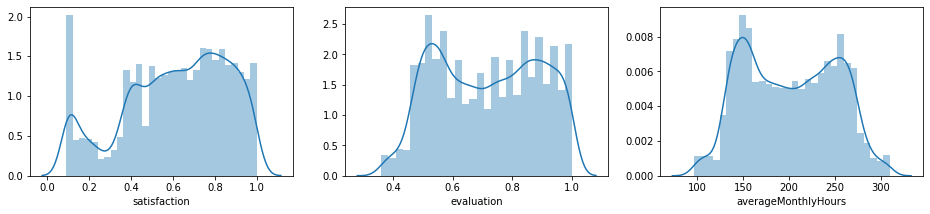

In [12]:
creating_distplot((16,18), hr_df, num_vars)

As we can see from the above figure, all graphs are bi-modal meaning there exist two groups.

## Cross-correlation matrix

                     satisfaction  evaluation  projectCount  \
satisfaction             1.000000    0.105021     -0.142970   
evaluation               0.105021    1.000000      0.349333   
projectCount            -0.142970    0.349333      1.000000   
averageMonthlyHours     -0.020048    0.339742      0.417211   
yearsAtCompany          -0.100866    0.131591      0.196786   
workAccident             0.058697   -0.007104     -0.004741   
turnover                -0.388375    0.006567      0.023787   
promotion                0.025605   -0.008684     -0.006064   

                     averageMonthlyHours  yearsAtCompany  workAccident  \
satisfaction                   -0.020048       -0.100866      0.058697   
evaluation                      0.339742        0.131591     -0.007104   
projectCount                    0.417211        0.196786     -0.004741   
averageMonthlyHours             1.000000        0.127755     -0.010143   
yearsAtCompany                  0.127755        1.000000      

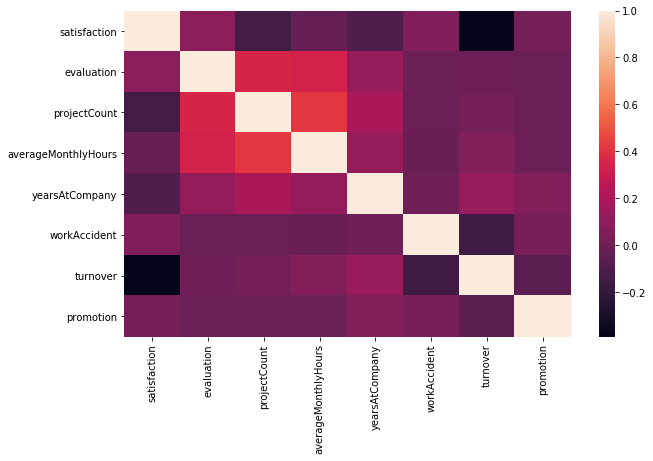

In [13]:
# Identifying the correlation between features and target variable
crossCorrelation(hr_df)

As we can see from this correlation matrix, satisfaction is negatively correlated with our target variable turnover. Among the features, projectEvaluation, evaluation, averageMonthlyHours are correlated with each other but it wont cause any issue as the correlation value is below 0.5.

[Text(0, 0.5, 'Percent')]

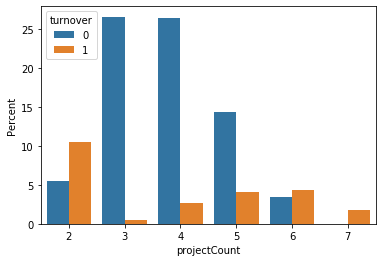

In [18]:
## Employee Project Count

##ax = sns.barplot(x="projectCount", y="projectCount", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
##ax.set(ylabel="Percent"
ax = sns.barplot(x="projectCount", y="projectCount", hue="turnover", data=hr_df, estimator = lambda x: len(x) / len(hr_df)*100)
ax.set(ylabel="Percent")

The above chart illustrates the following points:

1. Maximum number of people who have left the organization have projectCount as 2, 5 and 6.
2. People with projectCount 3, 4 and 5 have sustained in the organization.
3. All the people with projectCount 7 have left the organization.

In [28]:
# Employee Turnover w.r.t department

department_Turnover = pd.crosstab(hr_df['department'], hr_df['turnover'], rownames=['department'],colnames = ['turnover'])
department_Turnover.sort_values(1,0,ascending=False)

turnover,0,1
department,,
sales,3126,1014
technical,2023,697
support,1674,555
IT,954,273
hr,524,215
accounting,563,204
marketing,655,203
product_mng,704,198
RandD,666,121


As we can see it clearly states that people from sales department have left the organization in great numbers as followed by technical and support departments. 

Text(0.5, 1.0, 'Employee Satisfaction Distribution - Turnover V.S. No Turnover')

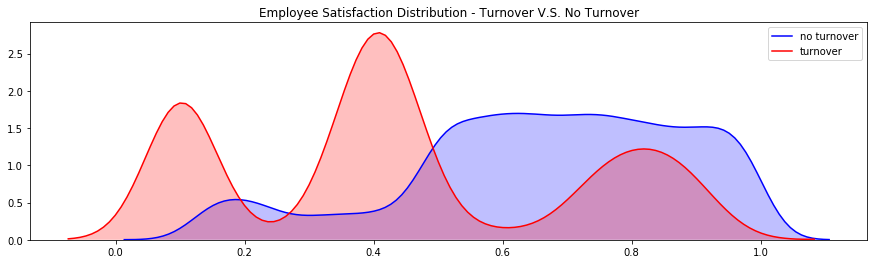

In [32]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax = sns.kdeplot(hr_df.loc[(hr_df['turnover'] == 0), 'satisfaction'], color = 'b', shade=True, label='no turnover')
ax=sns.kdeplot(hr_df.loc[(hr_df['turnover'] == 1),'satisfaction'] , color='r',shade=True, label='turnover')
plt.title('Employee Satisfaction Distribution - Turnover V.S. No Turnover')